# Date: 15/11/2025

In [1]:
import numpy as np
import pandas as pd
#data = pd.read_excel("Full_Data_Without_FFA.xlsx",sheet_name="data",engine="openpyxl")
data = pd.read_csv(r"D:\Python\20-hour-Python\College\FDS\ND.csv")
data.head(2)

,Sharp Peaked PED,Notched PED,Double Layer Sign,SRF,IRF,Multiple PED,Gold Standard
0,1,1,1,1,0,1,1
1,1,1,1,1,0,1,1


In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
from scipy.stats import ks_2samp
# Step 1: Clean column names
data.columns = [col.replace(" ", "_") for col in data.columns]

# Step 2: Split data
X = data.drop(columns=["Gold_Standard"])
y = data["Gold_Standard"]

Classification Report:

              precision    recall  f1-score   support

           0       0.85      0.81      0.83        27
           1       0.82      0.85      0.84        27

    accuracy                           0.83        54
   macro avg       0.83      0.83      0.83        54
weighted avg       0.83      0.83      0.83        54



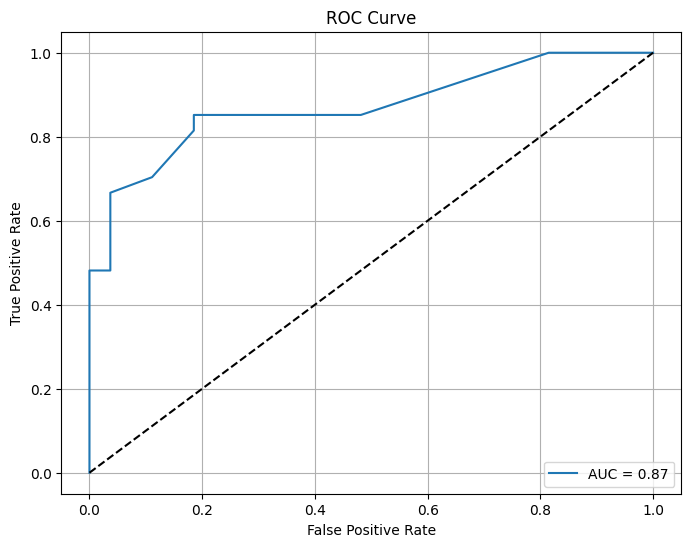

AUC Score: 0.8711
KS Statistic: 0.6667
Export complete: data_with_predictions.csv
             Feature  Importance
0   Sharp_Peaked_PED    0.314921
4                IRF    0.314495
3                SRF    0.142578
5       Multiple_PED    0.141720
2  Double_Layer_Sign    0.047560
1        Notched_PED    0.038727
AUC Score: 0.8711
Optimal Threshold: 0.5063
Maximum TPR - FPR (Youden's J): 0.6667
                 Metric     Value
0  Sensitivity (Recall)  0.814815
1           Specificity  0.814815
2       PPV (Precision)  0.814815
3                   NPV  0.814815
4              Accuracy  0.814815
5                   AUC  0.871056


In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=42)
clf = AdaBoostClassifier(random_state=42)
clf.fit(X_train, y_train)
# Step 4: Predictions and classification report
y_pred = clf.predict(X_test)
y_proba = clf.predict_proba(X_test)[:, 1]

print("Classification Report:\n")
print(classification_report(y_test, y_pred))

# Step 5: AUC and KS Statistic
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
auc_score = roc_auc_score(y_test, y_proba)
ks_stat = max(tpr - fpr)

# Plot AUC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {auc_score:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid()
plt.show()

print(f"AUC Score: {auc_score:.4f}")
print(f"KS Statistic: {ks_stat:.4f}")

# Step 6: Export with predicted probabilities
train_proba = clf.predict_proba(X_train)[:, 1]
test_proba = y_proba

X_train_export = X_train.copy()
X_train_export['Gold_Standard'] = y_train
X_train_export['Predicted_Probability'] = train_proba
X_train_export['Dataset'] = 'Train'

X_test_export = X_test.copy()
X_test_export['Gold_Standard'] = y_test
X_test_export['Predicted_Probability'] = test_proba
X_test_export['Dataset'] = 'Test'

export_df = pd.concat([X_train_export, X_test_export])
export_df.to_csv("final_result.csv", index=False)

print("Export complete: data_with_predictions.csv")
importances = clf.feature_importances_
feature_names = X.columns

# 5. Create a DataFrame with feature scores
feature_scores = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# 6. Display the scores
print(feature_scores)
from sklearn.metrics import roc_auc_score, roc_curve


y_probs = clf.predict_proba(X_test)[:, 1]


auc_score = roc_auc_score(y_test, y_probs)
print(f"AUC Score: {auc_score:.4f}")


fpr, tpr, thresholds = roc_curve(y_test, y_probs)


youden_index = tpr - fpr
optimal_idx = youden_index.argmax()
optimal_threshold = thresholds[optimal_idx]
optimal_tpr = tpr[optimal_idx]
optimal_fpr = fpr[optimal_idx]

print(f"Optimal Threshold: {optimal_threshold:.4f}")
print(f"Maximum TPR - FPR (Youden's J): {youden_index[optimal_idx]:.4f}")
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, roc_auc_score


y_pred_optimal = (y_probs > optimal_threshold).astype(int)


tn, fp, fn, tp = confusion_matrix(y_test, y_pred_optimal).ravel()


sensitivity = tp / (tp + fn)  # Recall / TPR
specificity = tn / (tn + fp)
ppv = tp / (tp + fp)          # Precision
npv = tn / (tn + fn)
accuracy = accuracy_score(y_test, y_pred_optimal)
auc = roc_auc_score(y_test, y_probs)  # Use probabilities here!


import pandas as pd

metrics_table = pd.DataFrame({
    'Metric': ['Sensitivity (Recall)', 'Specificity', 'PPV (Precision)', 'NPV', 'Accuracy', 'AUC'],
    'Value': [sensitivity, specificity, ppv, npv, accuracy, auc]
})

print(metrics_table)

Classification Report:

              precision    recall  f1-score   support

           0       0.74      0.93      0.82        27
           1       0.90      0.67      0.77        27

    accuracy                           0.80        54
   macro avg       0.82      0.80      0.79        54
weighted avg       0.82      0.80      0.79        54



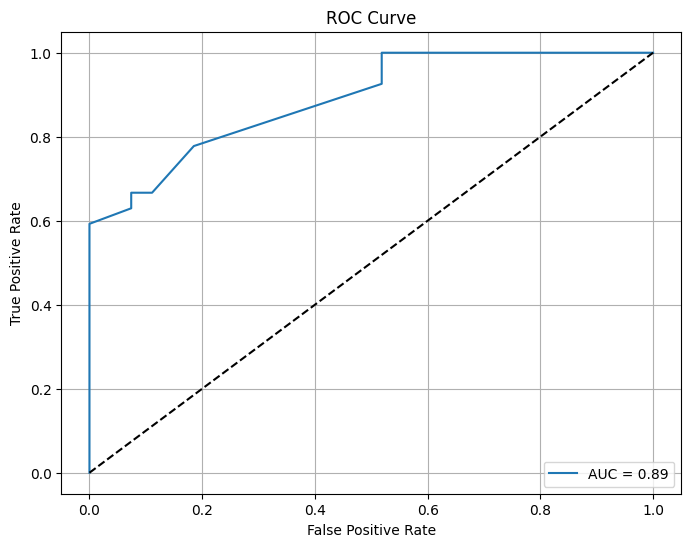

AUC Score: 0.8889
KS Statistic: 0.5926
Export complete: data_with_predictions.csv
             Feature  Importance
0   Sharp_Peaked_PED    0.328946
4                IRF    0.191616
5       Multiple_PED    0.187204
2  Double_Layer_Sign    0.129600
1        Notched_PED    0.101818
3                SRF    0.060817
AUC Score: 0.8889
Optimal Threshold: 0.7400
Maximum TPR - FPR (Youden's J): 0.5926
                 Metric     Value
0  Sensitivity (Recall)  0.481481
1           Specificity  1.000000
2       PPV (Precision)  1.000000
3                   NPV  0.658537
4              Accuracy  0.740741
5                   AUC  0.888889


In [4]:
#Random Forest
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
from scipy.stats import ks_2samp
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=42)
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)
# Step 4: Predictions and classification report
y_pred = clf.predict(X_test)
y_proba = clf.predict_proba(X_test)[:, 1]

print("Classification Report:\n")
print(classification_report(y_test, y_pred))

# Step 5: AUC and KS Statistic
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
auc_score = roc_auc_score(y_test, y_proba)
ks_stat = max(tpr - fpr)

# Plot AUC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {auc_score:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid()
plt.show()

print(f"AUC Score: {auc_score:.4f}")
print(f"KS Statistic: {ks_stat:.4f}")

# Step 6: Export with predicted probabilities
train_proba = clf.predict_proba(X_train)[:, 1]
test_proba = y_proba

X_train_export = X_train.copy()
X_train_export['Gold_Standard'] = y_train
X_train_export['Predicted_Probability'] = train_proba
X_train_export['Dataset'] = 'Train'

X_test_export = X_test.copy()
X_test_export['Gold_Standard'] = y_test
X_test_export['Predicted_Probability'] = test_proba
X_test_export['Dataset'] = 'Test'

export_df = pd.concat([X_train_export, X_test_export])
export_df.to_csv("final_result.csv", index=False)

print("Export complete: data_with_predictions.csv")
importances = clf.feature_importances_
feature_names = X.columns

# 5. Create a DataFrame with feature scores
feature_scores = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# 6. Display the scores
print(feature_scores)
from sklearn.metrics import roc_auc_score, roc_curve


y_probs = clf.predict_proba(X_test)[:, 1]


auc_score = roc_auc_score(y_test, y_probs)
print(f"AUC Score: {auc_score:.4f}")


fpr, tpr, thresholds = roc_curve(y_test, y_probs)


youden_index = tpr - fpr
optimal_idx = youden_index.argmax()
optimal_threshold = thresholds[optimal_idx]
optimal_tpr = tpr[optimal_idx]
optimal_fpr = fpr[optimal_idx]

print(f"Optimal Threshold: {optimal_threshold:.4f}")
print(f"Maximum TPR - FPR (Youden's J): {youden_index[optimal_idx]:.4f}")
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, roc_auc_score


y_pred_optimal = (y_probs > optimal_threshold).astype(int)


tn, fp, fn, tp = confusion_matrix(y_test, y_pred_optimal).ravel()


sensitivity = tp / (tp + fn)  # Recall / TPR
specificity = tn / (tn + fp)
ppv = tp / (tp + fp)          # Precision
npv = tn / (tn + fn)
accuracy = accuracy_score(y_test, y_pred_optimal)
auc = roc_auc_score(y_test, y_probs)  # Use probabilities here!


import pandas as pd

metrics_table = pd.DataFrame({
    'Metric': ['Sensitivity (Recall)', 'Specificity', 'PPV (Precision)', 'NPV', 'Accuracy', 'AUC'],
    'Value': [sensitivity, specificity, ppv, npv, accuracy, auc]
})

print(metrics_table)

Classification Report:

              precision    recall  f1-score   support

           0       0.71      0.93      0.81        27
           1       0.89      0.63      0.74        27

    accuracy                           0.78        54
   macro avg       0.80      0.78      0.77        54
weighted avg       0.80      0.78      0.77        54



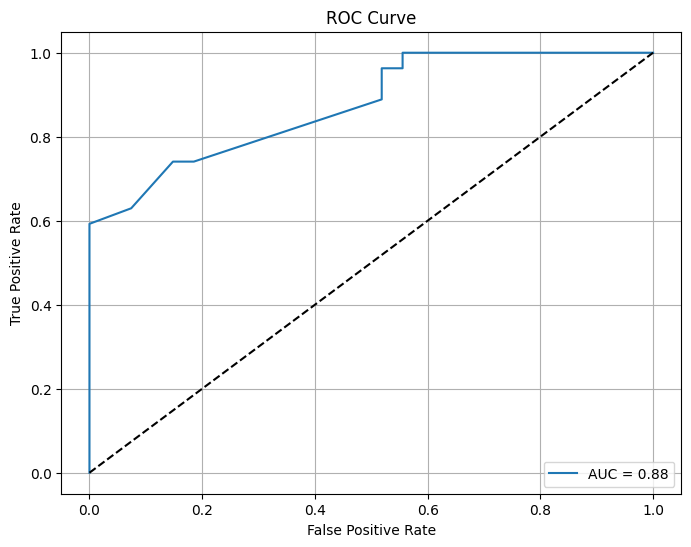

AUC Score: 0.8752
KS Statistic: 0.5926
Export complete: data_with_predictions.csv
             Feature  Importance
0   Sharp_Peaked_PED    0.605854
2  Double_Layer_Sign    0.131657
4                IRF    0.103790
5       Multiple_PED    0.090316
3                SRF    0.038017
1        Notched_PED    0.030366
AUC Score: 0.8752
Optimal Threshold: 0.9853
Maximum TPR - FPR (Youden's J): 0.5926
                 Metric     Value
0  Sensitivity (Recall)  0.481481
1           Specificity  1.000000
2       PPV (Precision)  1.000000
3                   NPV  0.658537
4              Accuracy  0.740741
5                   AUC  0.875171


In [5]:
# Gradient Boost
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
from scipy.stats import ks_2samp
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=42)
clf = GradientBoostingClassifier(random_state=42)
clf.fit(X_train, y_train)
# Step 4: Predictions and classification report
y_pred = clf.predict(X_test)
y_proba = clf.predict_proba(X_test)[:, 1]

print("Classification Report:\n")
print(classification_report(y_test, y_pred))

# Step 5: AUC and KS Statistic
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
auc_score = roc_auc_score(y_test, y_proba)
ks_stat = max(tpr - fpr)

# Plot AUC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {auc_score:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid()
plt.show()

print(f"AUC Score: {auc_score:.4f}")
print(f"KS Statistic: {ks_stat:.4f}")

# Step 6: Export with predicted probabilities
train_proba = clf.predict_proba(X_train)[:, 1]
test_proba = y_proba

X_train_export = X_train.copy()
X_train_export['Gold_Standard'] = y_train
X_train_export['Predicted_Probability'] = train_proba
X_train_export['Dataset'] = 'Train'

X_test_export = X_test.copy()
X_test_export['Gold_Standard'] = y_test
X_test_export['Predicted_Probability'] = test_proba
X_test_export['Dataset'] = 'Test'

export_df = pd.concat([X_train_export, X_test_export])
export_df.to_csv("final_result.csv", index=False)

print("Export complete: data_with_predictions.csv")
importances = clf.feature_importances_
feature_names = X.columns

# 5. Create a DataFrame with feature scores
feature_scores = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# 6. Display the scores
print(feature_scores)
from sklearn.metrics import roc_auc_score, roc_curve


y_probs = clf.predict_proba(X_test)[:, 1]


auc_score = roc_auc_score(y_test, y_probs)
print(f"AUC Score: {auc_score:.4f}")


fpr, tpr, thresholds = roc_curve(y_test, y_probs)


youden_index = tpr - fpr
optimal_idx = youden_index.argmax()
optimal_threshold = thresholds[optimal_idx]
optimal_tpr = tpr[optimal_idx]
optimal_fpr = fpr[optimal_idx]

print(f"Optimal Threshold: {optimal_threshold:.4f}")
print(f"Maximum TPR - FPR (Youden's J): {youden_index[optimal_idx]:.4f}")
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, roc_auc_score


y_pred_optimal = (y_probs > optimal_threshold).astype(int)


tn, fp, fn, tp = confusion_matrix(y_test, y_pred_optimal).ravel()


sensitivity = tp / (tp + fn)  # Recall / TPR
specificity = tn / (tn + fp)
ppv = tp / (tp + fp)          # Precision
npv = tn / (tn + fn)
accuracy = accuracy_score(y_test, y_pred_optimal)
auc = roc_auc_score(y_test, y_probs)  # Use probabilities here!


import pandas as pd

metrics_table = pd.DataFrame({
    'Metric': ['Sensitivity (Recall)', 'Specificity', 'PPV (Precision)', 'NPV', 'Accuracy', 'AUC'],
    'Value': [sensitivity, specificity, ppv, npv, accuracy, auc]
})

print(metrics_table)

c:\Users\Rashmi\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:199: UserWarning: [16:32:15] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Classification Report:

              precision    recall  f1-score   support

           0       0.74      0.93      0.82        27
           1       0.90      0.67      0.77        27

    accuracy                           0.80        54
   macro avg       0.82      0.80      0.79        54
weighted avg       0.82      0.80      0.79        54



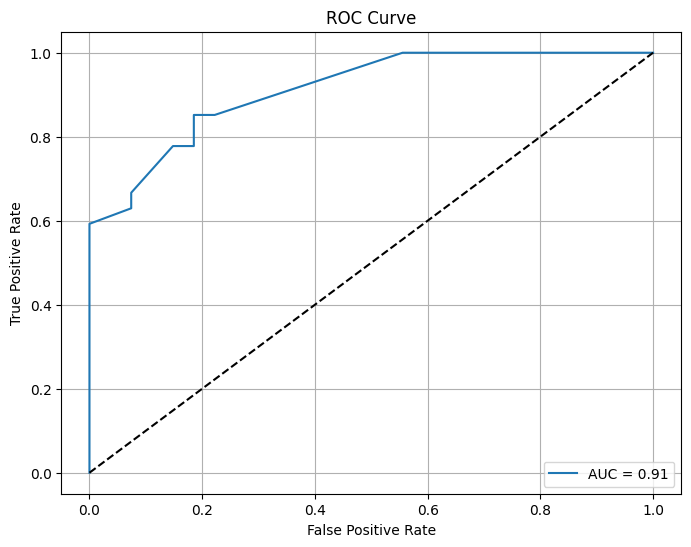

AUC Score: 0.9122
KS Statistic: 0.6667
Export complete: data_with_predictions.csv
             Feature  Importance
0   Sharp_Peaked_PED    0.435144
4                IRF    0.252069
3                SRF    0.157624
2  Double_Layer_Sign    0.083478
5       Multiple_PED    0.050114
1        Notched_PED    0.021571
AUC Score: 0.9122
Optimal Threshold: 0.3824
Maximum TPR - FPR (Youden's J): 0.6667
                 Metric     Value
0  Sensitivity (Recall)  0.777778
1           Specificity  0.814815
2       PPV (Precision)  0.807692
3                   NPV  0.785714
4              Accuracy  0.796296
5                   AUC  0.912209


In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
from scipy.stats import ks_2samp
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=42)
clf = XGBClassifier(use_label_encoder=False, eval_metric="logloss", random_state=42)
clf.fit(X_train, y_train)
# Step 4: Predictions and classification report
y_pred = clf.predict(X_test)
y_proba = clf.predict_proba(X_test)[:, 1]

print("Classification Report:\n")
print(classification_report(y_test, y_pred))

# Step 5: AUC and KS Statistic
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
auc_score = roc_auc_score(y_test, y_proba)
ks_stat = max(tpr - fpr)

# Plot AUC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {auc_score:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid()
plt.show()

print(f"AUC Score: {auc_score:.4f}")
print(f"KS Statistic: {ks_stat:.4f}")

# Step 6: Export with predicted probabilities
train_proba = clf.predict_proba(X_train)[:, 1]
test_proba = y_proba

X_train_export = X_train.copy()
X_train_export['Gold_Standard'] = y_train
X_train_export['Predicted_Probability'] = train_proba
X_train_export['Dataset'] = 'Train'

X_test_export = X_test.copy()
X_test_export['Gold_Standard'] = y_test
X_test_export['Predicted_Probability'] = test_proba
X_test_export['Dataset'] = 'Test'

export_df = pd.concat([X_train_export, X_test_export])
export_df.to_csv("final_result.csv", index=False)

print("Export complete: data_with_predictions.csv")
importances = clf.feature_importances_
feature_names = X.columns

# 5. Create a DataFrame with feature scores
feature_scores = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# 6. Display the scores
print(feature_scores)
from sklearn.metrics import roc_auc_score, roc_curve


y_probs = clf.predict_proba(X_test)[:, 1]


auc_score = roc_auc_score(y_test, y_probs)
print(f"AUC Score: {auc_score:.4f}")


fpr, tpr, thresholds = roc_curve(y_test, y_probs)


youden_index = tpr - fpr
optimal_idx = youden_index.argmax()
optimal_threshold = thresholds[optimal_idx]
optimal_tpr = tpr[optimal_idx]
optimal_fpr = fpr[optimal_idx]

print(f"Optimal Threshold: {optimal_threshold:.4f}")
print(f"Maximum TPR - FPR (Youden's J): {youden_index[optimal_idx]:.4f}")
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, roc_auc_score


y_pred_optimal = (y_probs > optimal_threshold).astype(int)


tn, fp, fn, tp = confusion_matrix(y_test, y_pred_optimal).ravel()


sensitivity = tp / (tp + fn)  # Recall / TPR
specificity = tn / (tn + fp)
ppv = tp / (tp + fp)          # Precision
npv = tn / (tn + fn)
accuracy = accuracy_score(y_test, y_pred_optimal)
auc = roc_auc_score(y_test, y_probs)  # Use probabilities here!


import pandas as pd

metrics_table = pd.DataFrame({
    'Metric': ['Sensitivity (Recall)', 'Specificity', 'PPV (Precision)', 'NPV', 'Accuracy', 'AUC'],
    'Value': [sensitivity, specificity, ppv, npv, accuracy, auc]
})

print(metrics_table)

Accuracy: 1.00
Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        17
  versicolor       1.00      1.00      1.00        13

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



C:\Users\Rashmi\AppData\Local\Temp\ipykernel_13172\933904624.py:40: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(X_test_scaled[:, 0], X_test_scaled[:, 1], c=y_pred, cmap=plt.cm.Paired, edgecolors='k', marker='x', s=100, label='Test Data (Predicted)')


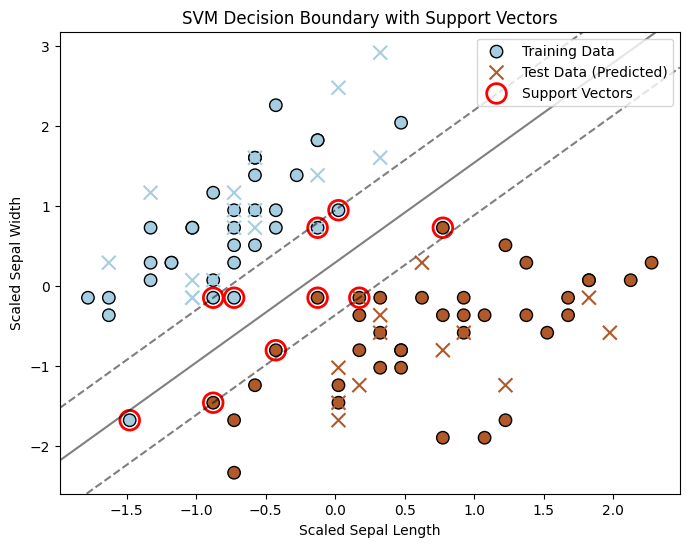

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# 1. Load the dataset
iris = datasets.load_iris()
X = iris.data[:, :2]  # Using only the first two features for visualization
y = iris.target

# Filter for two classes (e.g., setosa and versicolor) for simpler visualization
X = X[y != 2]
y = y[y != 2]

# 2. Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 3. Scale the features (important for SVMs)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 4. Train the SVM model
# Using a linear kernel for this example
svm_classifier = SVC(kernel='linear', C=1.0, random_state=42)
svm_classifier.fit(X_train_scaled, y_train)

# 5. Make predictions and evaluate
y_pred = svm_classifier.predict(X_test_scaled)
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=iris.target_names[:2]))

# 6. Visualize the decision boundary (for 2D data)
plt.figure(figsize=(8, 6))
plt.scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], c=y_train, cmap=plt.cm.Paired, edgecolors='k', s=80, label='Training Data')
plt.scatter(X_test_scaled[:, 0], X_test_scaled[:, 1], c=y_pred, cmap=plt.cm.Paired, edgecolors='k', marker='x', s=100, label='Test Data (Predicted)')

# Plot the decision boundary
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = svm_classifier.decision_function(xy).reshape(XX.shape)

ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])
ax.scatter(svm_classifier.support_vectors_[:, 0], svm_classifier.support_vectors_[:, 1], s=200, facecolors='none', edgecolors='r', linewidth=2, label='Support Vectors')

plt.xlabel('Scaled Sepal Length')
plt.ylabel('Scaled Sepal Width')
plt.title('SVM Decision Boundary with Support Vectors')
plt.legend()
plt.show()

Predicted class for new point [4 5]: 1
Model accuracy on test set: 0.00


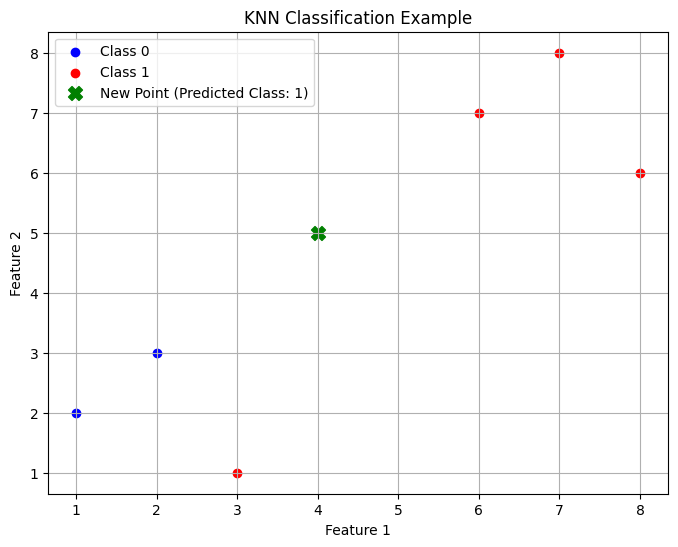

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Sample Data
X = np.array([[1, 2], [2, 3], [3, 1], [6, 7], [7, 8], [8, 6]])
y = np.array([0, 0, 1, 1, 1, 1]) # Classes

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale features (important for distance-based algorithms like KNN)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
# Initialize and train the KNN classifier
# n_neighbors is 'k', the number of nearest neighbors to consider
knn = KNeighborsClassifier(n_neighbors=3) 
knn.fit(X_train_scaled, y_train)
# Predict the class of a new data point
new_point = np.array([[4, 5]])
new_point_scaled = scaler.transform(new_point)
prediction = knn.predict(new_point_scaled)
print(f"Predicted class for new point {new_point[0]}: {prediction[0]}")
# Evaluate the model's performance on the test set
accuracy = knn.score(X_test_scaled, y_test)
print(f"Model accuracy on test set: {accuracy:.2f}")

# Visualize the data and the new point
plt.figure(figsize=(8, 6))
plt.scatter(X[y == 0, 0], X[y == 0, 1], c='blue', label='Class 0')
plt.scatter(X[y == 1, 0], X[y == 1, 1], c='red', label='Class 1')
plt.scatter(new_point[0, 0], new_point[0, 1], c='green', marker='X', s=100, label=f'New Point (Predicted Class: {prediction[0]})')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('KNN Classification Example')
plt.legend()
plt.grid(True)
plt.show()

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_percentage_error
data = pd.read_csv(r"D:\Python\20-hour-Python\College\FDS\TS.csv")
data.head(2)

FileNotFoundError: [Errno 2] No such file or directory: 'D:\\Python\\20-hour-Python\\College\\FDS\\TS.csv'